In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import ast
import collections
from PIL import Image
import torch
from torchvision import transforms
from wordcloud import WordCloud, STOPWORDS
import json

In [41]:
captions = np.load('embeddings_processed/list_of_list_of_file_captions.npy',allow_pickle = True)[:1000]

instances = np.load('embeddings_processed/list_of_list_of_file_instances.npy',allow_pickle = True)[:1000]

stuff = np.load('embeddings_processed/list_of_list_of_file_stuff.npy',allow_pickle = True)[:1000]

image_id_list = np.load('embeddings_processed/image_id_list.npy',allow_pickle = True)[:1000]

cocoval_embeddings = np.load('embeddings_processed/alexnet_cocoval_fc6_recent.npy')[:1000,:]

# compute percentile thresholds

In [42]:
# get embedding percentile thresholds
np.random.seed(90)
cocoval_embeddings = cocoval_embeddings + np.random.randn(*cocoval_embeddings.shape)/1000000
sorted_indices_embedding = np.argsort(cocoval_embeddings,axis = 0)

indices_90_embedding = sorted_indices_embedding[int(90/100*cocoval_embeddings.shape[0]-1),:]
embedding_threshold_90 = cocoval_embeddings[indices_90_embedding, range(4096)].reshape(1,4096)


# compute co-active sub-embedding features between image pairs

In [43]:
cocoval_embeddings_active = (cocoval_embeddings >= embedding_threshold_90)*1

cocoval_embeddings_active_t = cocoval_embeddings_active.T
cocoval_embeddings_active_expanded = np.expand_dims(cocoval_embeddings_active, axis=2)
cocoval_embeddings_active_t_expanded = np.expand_dims(cocoval_embeddings_active_t, axis=0)
co_active_feats = cocoval_embeddings_active_expanded*cocoval_embeddings_active_t_expanded

co_active_features_cocoval_emb = np.sum(co_active_feats,axis=1)


co_active_features_cocoval_emb_no_same_duplicate = co_active_features_cocoval_emb.copy()

# histogram of the number of co-active sub-embedding features between unique image pairs

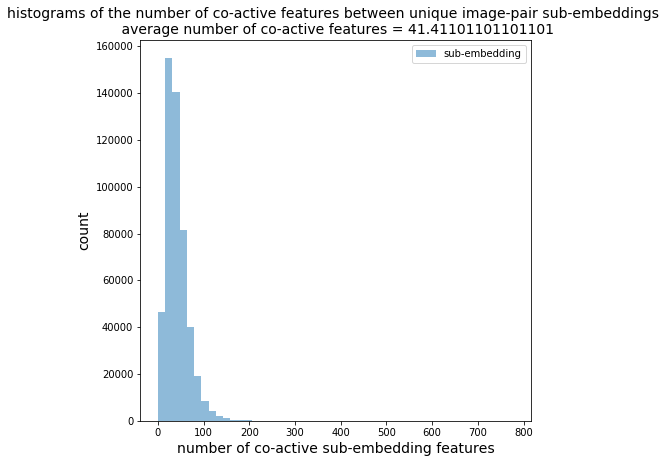

In [44]:
co_active_features_cocoval_emb_no_same_duplicate = []
for index_1 in range(co_active_features_cocoval_emb.shape[0]):
    for index_2 in range(co_active_features_cocoval_emb.shape[0]):
        if index_1 < index_2:
            co_active_features_cocoval_emb_no_same_duplicate.append(co_active_features_cocoval_emb[index_1, index_2])
            
co_active_features_cocoval_emb_no_same_duplicate = np.array(co_active_features_cocoval_emb_no_same_duplicate)
average_cocoval_emb = np.average(co_active_features_cocoval_emb_no_same_duplicate)
    
bins=np.linspace(np.min(co_active_features_cocoval_emb_no_same_duplicate), np.max(co_active_features_cocoval_emb_no_same_duplicate),50)
plt.figure(figsize=(7,7))
plt.title('histograms of the number of co-active features between unique image-pair sub-embeddings \n average number of co-active features = '+str(average_cocoval_emb), fontsize=14)
plt.hist(co_active_features_cocoval_emb_no_same_duplicate.flatten(),bins=bins, label = 'sub-embedding', alpha = 0.5)
plt.ylabel('count',fontsize=14)
plt.xlabel('number of co-active sub-embedding features',fontsize=14)
plt.legend()
plt.show()
plt.close()

# heatmap of the number of co-active sub-embedding features between all image-pairs

Text(0, 0.5, 'Image index')

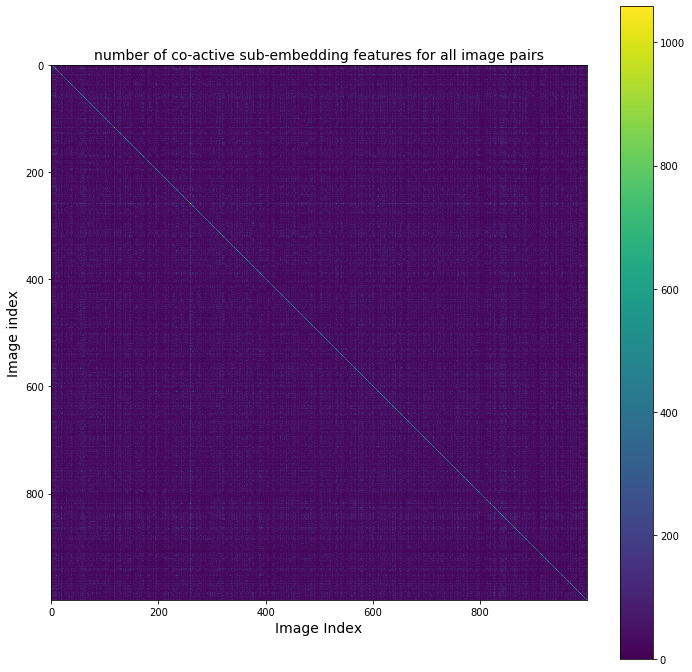

In [45]:
co_active_feats_sum = np.squeeze(np.sum(co_active_feats, axis=1))
plt.figure(figsize=(12,12))
plt.title('number of co-active sub-embedding features for all image pairs', fontsize=14)
plt.imshow(co_active_feats_sum)
plt.colorbar()

plt.ylabel('number of co-active features ',fontsize=14)
plt.xlabel('Image Index',fontsize=14)
plt.ylabel('Image index',fontsize=14)

# visualization of top-50 image pairs with most co-active sub-embedding features, common "instance" and "stuff" objects 

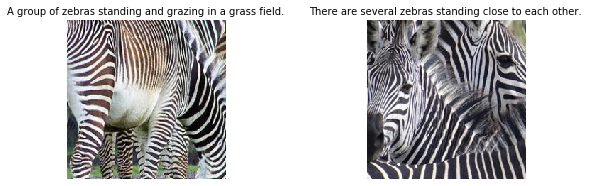

common "instance" object: zebra
number of co-activations:  777
number of common "instance" objects":  1
number of common "stuff" objects":  0 




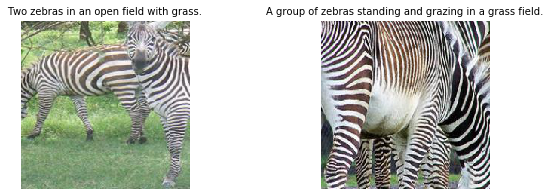

common "instance" object: zebra
common "stuff" objects: grass
number of co-activations:  672
number of common "instance" objects":  1
number of common "stuff" objects":  1 




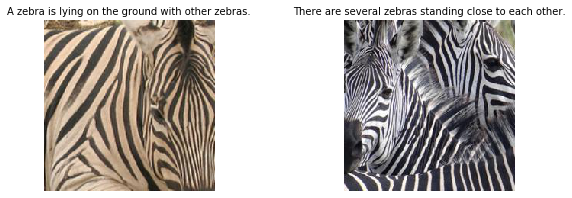

common "instance" object: zebra
number of co-activations:  629
number of common "instance" objects":  1
number of common "stuff" objects":  0 




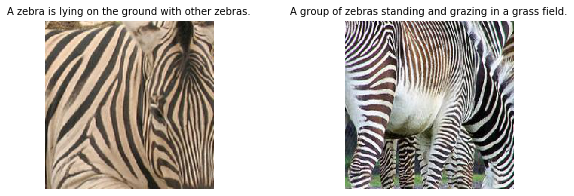

common "instance" object: zebra
common "stuff" objects: dirt
number of co-activations:  610
number of common "instance" objects":  1
number of common "stuff" objects":  1 




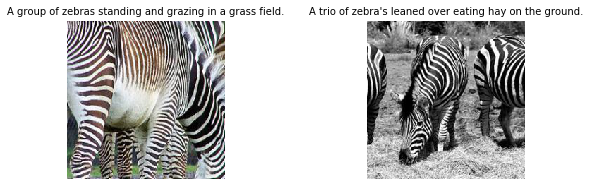

common "instance" object: zebra
common "stuff" objects: dirt
number of co-activations:  580
number of common "instance" objects":  1
number of common "stuff" objects":  1 




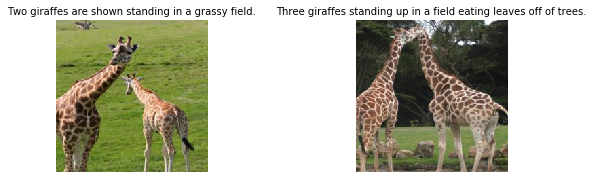

common "instance" object: giraffe
common "stuff" objects: grass
number of co-activations:  399
number of common "instance" objects":  1
number of common "stuff" objects":  1 




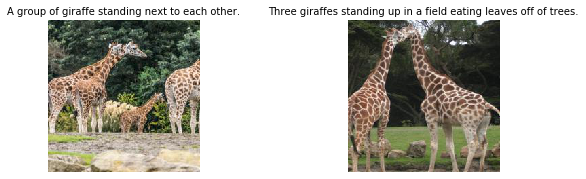

common "instance" object: giraffe
common "stuff" objects: tree, grass, dirt
number of co-activations:  340
number of common "instance" objects":  1
number of common "stuff" objects":  3 




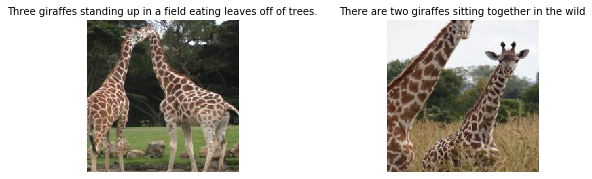

common "instance" object: giraffe
common "stuff" objects: tree, sky-other, grass
number of co-activations:  336
number of common "instance" objects":  1
number of common "stuff" objects":  3 




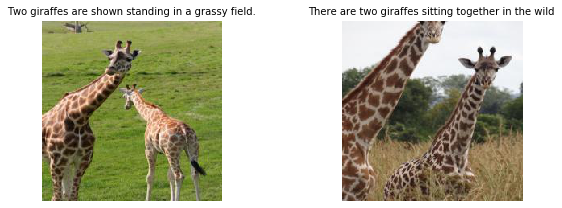

common "instance" object: giraffe
common "stuff" objects: grass
number of co-activations:  335
number of common "instance" objects":  1
number of common "stuff" objects":  1 




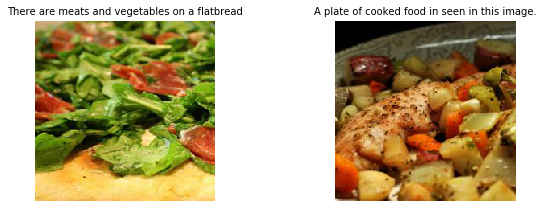

common "instance" object: fork
common "stuff" objects: food-other
number of co-activations:  316
number of common "instance" objects":  1
number of common "stuff" objects":  1 




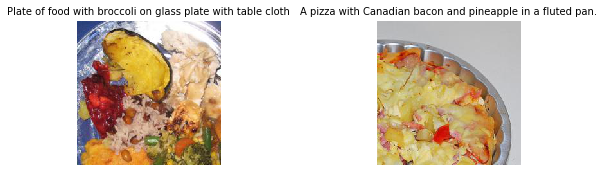

number of co-activations:  292
number of common "instance" objects":  0
number of common "stuff" objects":  0 




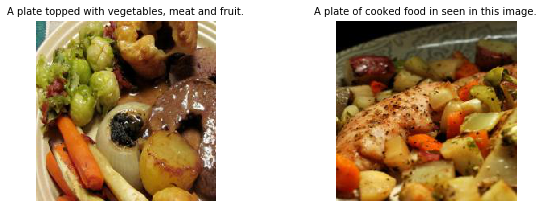

common "instance" object: fork, carrot
number of co-activations:  288
number of common "instance" objects":  2
number of common "stuff" objects":  0 




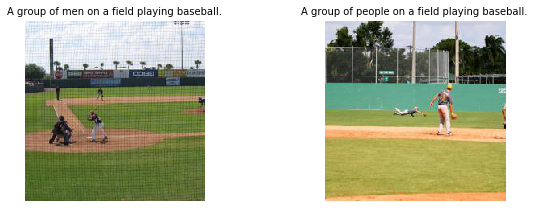

common "instance" object: baseball glove, person
common "stuff" objects: clouds, tree, playingfield
number of co-activations:  284
number of common "instance" objects":  2
number of common "stuff" objects":  3 




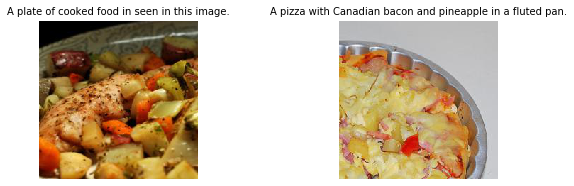

number of co-activations:  282
number of common "instance" objects":  0
number of common "stuff" objects":  0 




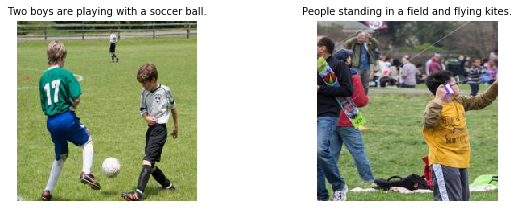

common "instance" object: person
number of co-activations:  282
number of common "instance" objects":  1
number of common "stuff" objects":  0 




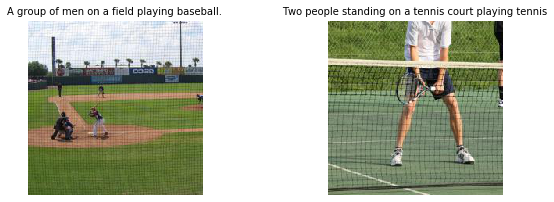

common "instance" object: person
common "stuff" objects: playingfield
number of co-activations:  281
number of common "instance" objects":  1
number of common "stuff" objects":  1 




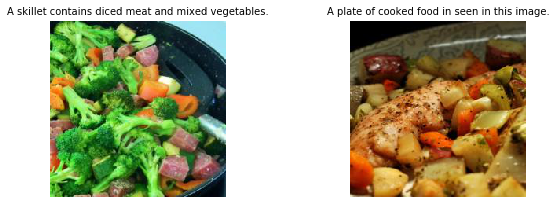

common "instance" object: carrot
common "stuff" objects: vegetable, food-other
number of co-activations:  275
number of common "instance" objects":  1
number of common "stuff" objects":  2 




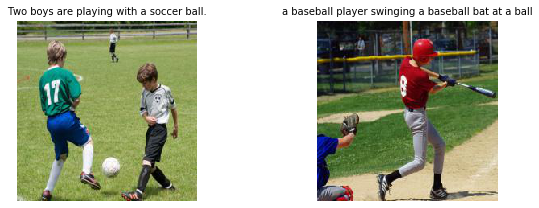

common "instance" object: sports ball, person
common "stuff" objects: fence
number of co-activations:  274
number of common "instance" objects":  2
number of common "stuff" objects":  1 




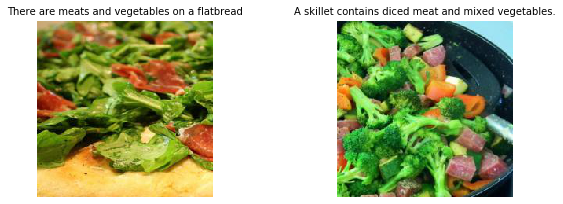

common "stuff" objects: table, food-other, furniture-other
number of co-activations:  273
number of common "instance" objects":  0
number of common "stuff" objects":  3 




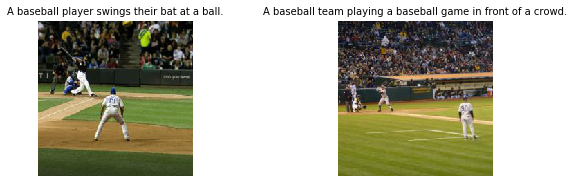

common "instance" object: baseball bat, baseball glove, person
common "stuff" objects: fence, building-other, playingfield
number of co-activations:  273
number of common "instance" objects":  3
number of common "stuff" objects":  3 




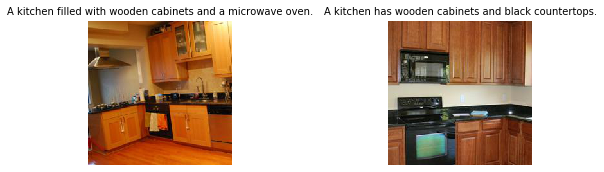

common "instance" object: oven, sink, microwave
common "stuff" objects: window-other, ceiling-other, furniture-other, wall-concrete, counter, cabinet
number of co-activations:  272
number of common "instance" objects":  3
number of common "stuff" objects":  6 




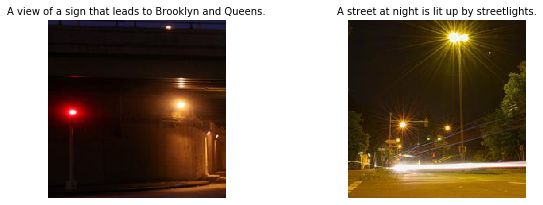

common "instance" object: traffic light
common "stuff" objects: light, building-other, sky-other, road, metal
number of co-activations:  271
number of common "instance" objects":  1
number of common "stuff" objects":  5 




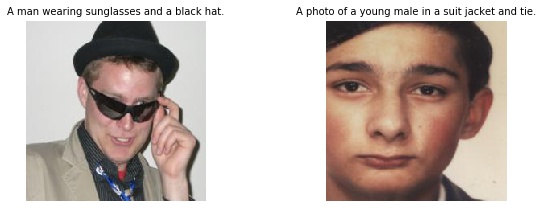

common "instance" object: tie, person
number of co-activations:  270
number of common "instance" objects":  2
number of common "stuff" objects":  0 




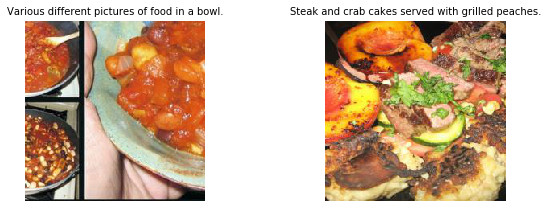

common "stuff" objects: table, metal
number of co-activations:  266
number of common "instance" objects":  0
number of common "stuff" objects":  2 




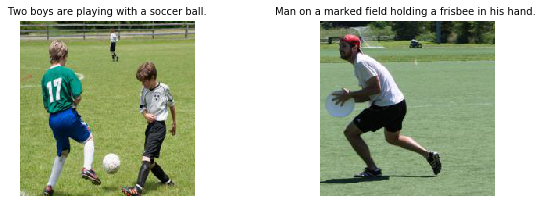

common "instance" object: person
common "stuff" objects: fence, playingfield
number of co-activations:  265
number of common "instance" objects":  1
number of common "stuff" objects":  2 




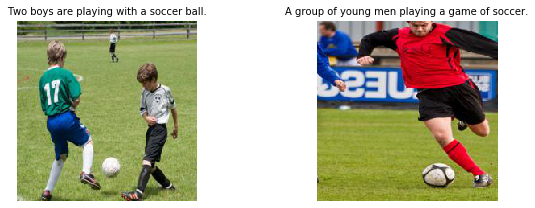

common "instance" object: sports ball, person
common "stuff" objects: playingfield
number of co-activations:  263
number of common "instance" objects":  2
number of common "stuff" objects":  1 




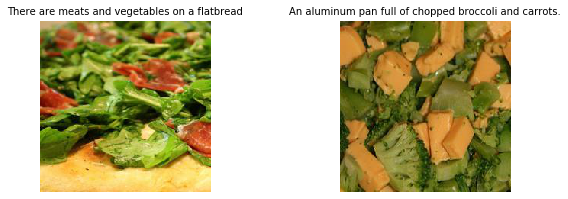

common "stuff" objects: table
number of co-activations:  263
number of common "instance" objects":  0
number of common "stuff" objects":  1 




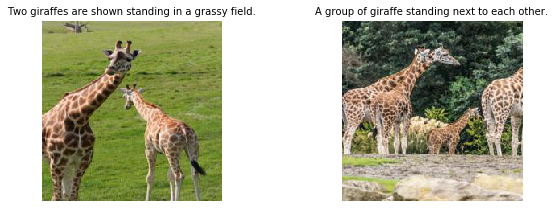

common "instance" object: giraffe
common "stuff" objects: grass
number of co-activations:  262
number of common "instance" objects":  1
number of common "stuff" objects":  1 




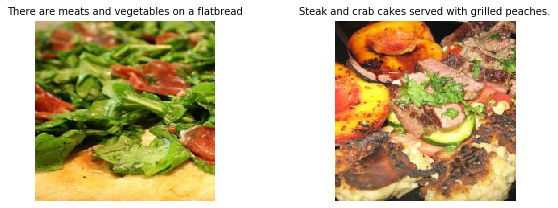

common "instance" object: pizza
common "stuff" objects: table, food-other
number of co-activations:  261
number of common "instance" objects":  1
number of common "stuff" objects":  2 




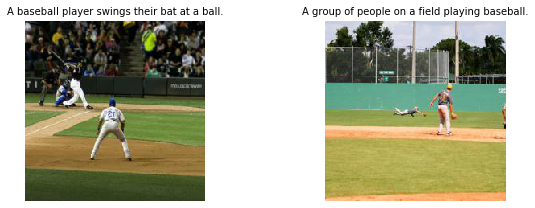

common "instance" object: baseball glove, person
common "stuff" objects: playingfield
number of co-activations:  259
number of common "instance" objects":  2
number of common "stuff" objects":  1 




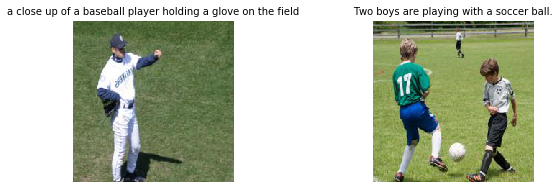

common "instance" object: person
number of co-activations:  257
number of common "instance" objects":  1
number of common "stuff" objects":  0 




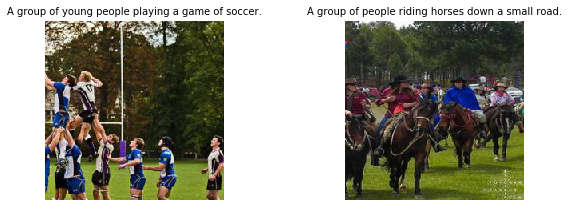

common "instance" object: person
common "stuff" objects: tree, sky-other, grass
number of co-activations:  257
number of common "instance" objects":  1
number of common "stuff" objects":  3 




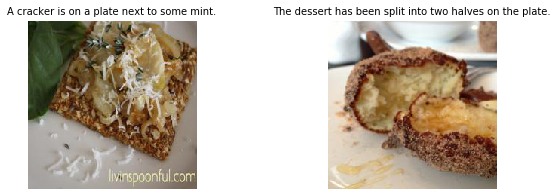

number of co-activations:  255
number of common "instance" objects":  0
number of common "stuff" objects":  0 




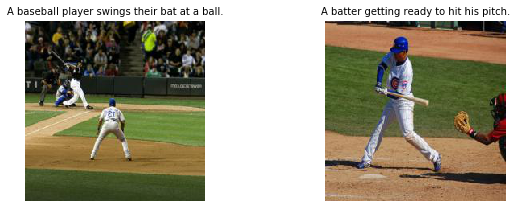

common "instance" object: baseball bat, baseball glove, person
common "stuff" objects: fence, playingfield
number of co-activations:  254
number of common "instance" objects":  3
number of common "stuff" objects":  2 




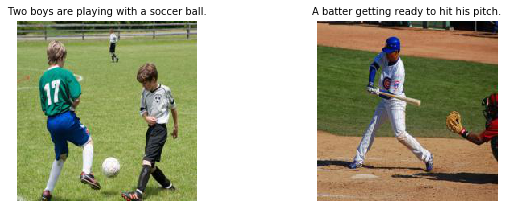

common "instance" object: sports ball, person
common "stuff" objects: fence, playingfield
number of co-activations:  253
number of common "instance" objects":  2
number of common "stuff" objects":  2 




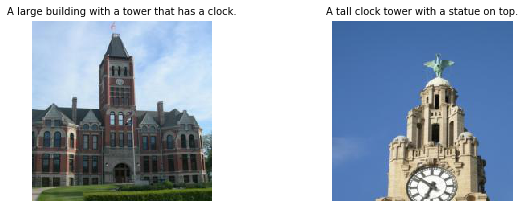

common "instance" object: clock
common "stuff" objects: sky-other
number of co-activations:  253
number of common "instance" objects":  1
number of common "stuff" objects":  1 




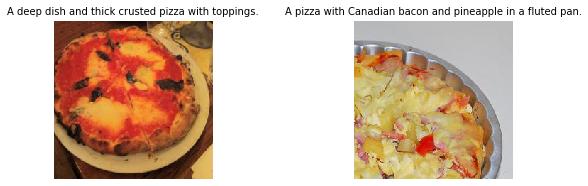

common "instance" object: pizza
common "stuff" objects: furniture-other
number of co-activations:  253
number of common "instance" objects":  1
number of common "stuff" objects":  1 




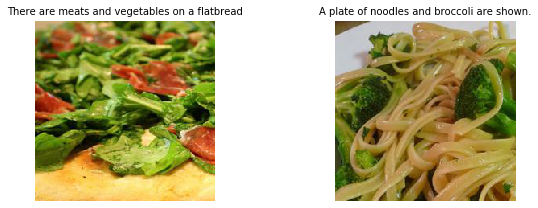

common "instance" object: fork
common "stuff" objects: table
number of co-activations:  251
number of common "instance" objects":  1
number of common "stuff" objects":  1 




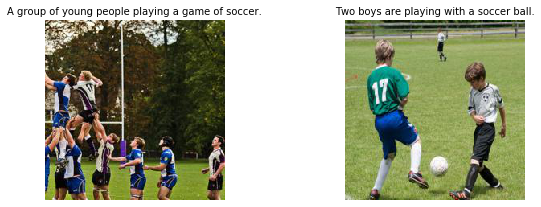

common "instance" object: sports ball, person
number of co-activations:  251
number of common "instance" objects":  2
number of common "stuff" objects":  0 




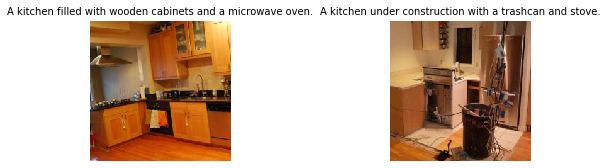

common "instance" object: sink, oven
common "stuff" objects: floor-wood, window-other, ceiling-other, wall-concrete, counter, cabinet
number of co-activations:  249
number of common "instance" objects":  2
number of common "stuff" objects":  6 




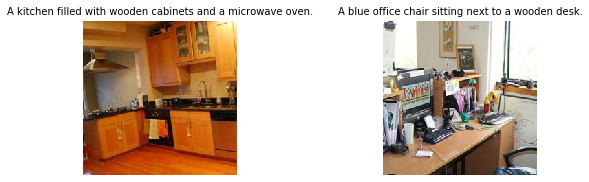

common "instance" object: tv
common "stuff" objects: wall-concrete, window-other, furniture-other
number of co-activations:  249
number of common "instance" objects":  1
number of common "stuff" objects":  3 




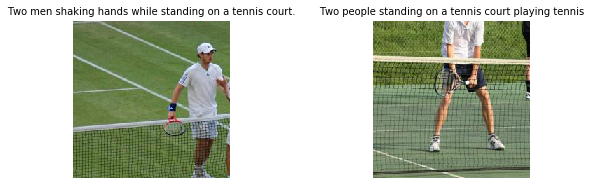

common "instance" object: tennis racket, person
common "stuff" objects: net, playingfield
number of co-activations:  248
number of common "instance" objects":  2
number of common "stuff" objects":  2 




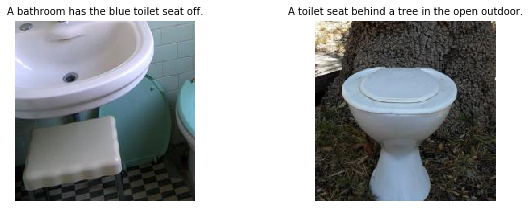

common "instance" object: toilet
number of co-activations:  248
number of common "instance" objects":  1
number of common "stuff" objects":  0 




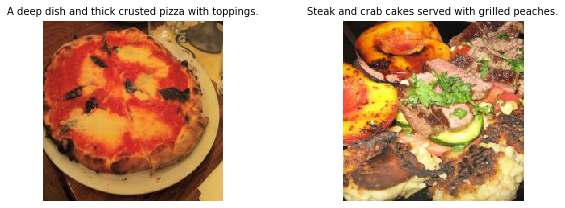

common "instance" object: pizza
common "stuff" objects: food-other, table
number of co-activations:  246
number of common "instance" objects":  1
number of common "stuff" objects":  2 




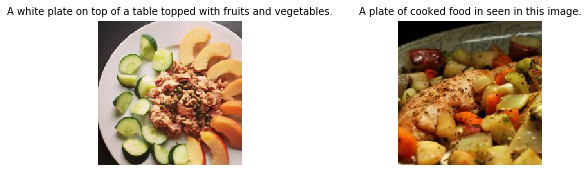

common "instance" object: apple
number of co-activations:  245
number of common "instance" objects":  1
number of common "stuff" objects":  0 




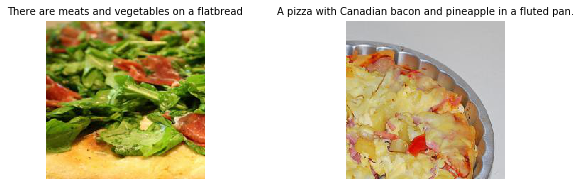

common "instance" object: pizza
common "stuff" objects: furniture-other
number of co-activations:  245
number of common "instance" objects":  1
number of common "stuff" objects":  1 




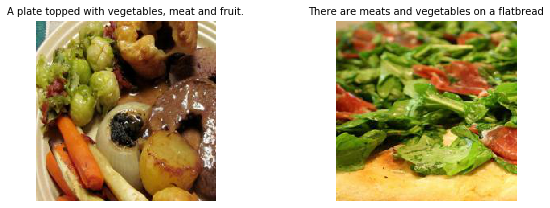

common "instance" object: fork, dining table
number of co-activations:  244
number of common "instance" objects":  2
number of common "stuff" objects":  0 




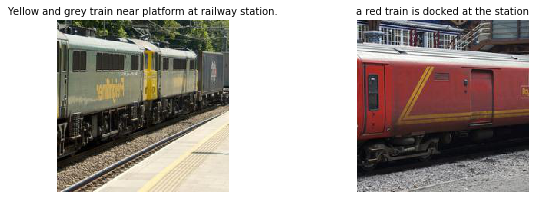

common "instance" object: train
common "stuff" objects: pavement, building-other, railroad
number of co-activations:  243
number of common "instance" objects":  1
number of common "stuff" objects":  3 




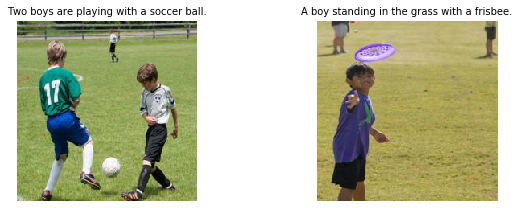

common "instance" object: person
number of co-activations:  243
number of common "instance" objects":  1
number of common "stuff" objects":  0 




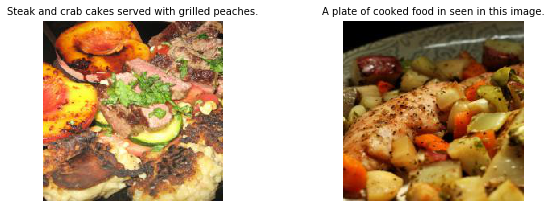

common "stuff" objects: food-other
number of co-activations:  243
number of common "instance" objects":  0
number of common "stuff" objects":  1 




In [54]:
image_pair_indices = []
co_active_feats_list = []

num_stuff_list = []
num_instances_list = []
num_object_list = []
num_co_active_list = []

num_co_activ_stuff = collections.defaultdict(list)
num_co_activ_instances = collections.defaultdict(list)
num_co_activ_object = collections.defaultdict(list)

for index_1 in range(co_active_features_cocoval_emb.shape[0]):
    for index_2 in range(co_active_features_cocoval_emb.shape[0]):
        if (index_2 < index_1):
            image_pair_indices.append((index_1,index_2))
            co_active_feats_list.append(co_active_features_cocoval_emb[index_1,index_2])

co_active_feats_list = np.array(co_active_feats_list) 
co_active_feats_list_sorted = np.argsort(-co_active_feats_list)

count = 0

giraffe_count = 0
zebra_count = 0

for index in co_active_feats_list_sorted:
    
   
    
    ind_1,ind_2 = image_pair_indices[index][0], image_pair_indices[index][1]
    img_1, img_2 = mpimg.imread(image_id_list[ind_1]),mpimg.imread(image_id_list[ind_2])
    
    caption_1,caption_2 = captions[ind_1][0], captions[ind_2][0]
    instances_1,instances_2 = instances[ind_1], instances[ind_2]
    stuff_1, stuff_2 = stuff[ind_1], stuff[ind_2]
    
    common_instances = set(instances_1).intersection(set(instances_2))
    common_stuff = set(stuff_1).intersection(set(stuff_2))
    
    if 'other' in common_instances:
        common_instances.remove('other')
  
    if 'other' in common_stuff:
        common_stuff.remove('other')
        
    common_instances = list(common_instances)
    num_instances_list.append(len(common_instances))
        
    common_stuff = list(common_stuff)
    num_stuff_list.append(len(common_stuff))
    
    num_object_list.append(len(common_instances)+len(common_stuff))
    
        
    num_co_active_list.append(co_active_feats_list[index])
    
    num_co_activ_stuff[len(common_stuff)].append(co_active_feats_list[index])
    num_co_activ_instances[len(common_instances)].append(co_active_feats_list[index])
    num_co_activ_object[len(common_instances)+len(common_stuff)].append(co_active_feats_list[index])
    
    
    if 'zebra' in instances_1 or 'zebra' in instances_2:
        zebra_count += 1
        if(zebra_count > 5):
            continue
            
    if 'giraffe' in instances_1 or 'giraffe' in instances_2:
        giraffe_count += 1
        if(giraffe_count > 5):
            continue
    
    if count < 100:
        fig, axs = plt.subplots(1,2, figsize=(10,10))
        axs[0].imshow(img_1)
        axs[0].axis('off')
        axs[0].set_title(caption_1, fontsize=10)
        axs[1].imshow(img_2)
        axs[1].axis('off')
        axs[1].set_title(caption_2, fontsize=10)
        plt.tight_layout(pad=12.0)
        plt.show()
        
        if len(common_instances)>0 :
            print('common "instance" object:', ', '.join(common_instances))
    
        if len(common_stuff)>0 :
            print('common "stuff" objects:', ', '.join(common_stuff))
            
        print('number of co-activations: ',co_active_feats_list[index])
        print('number of common "instance" objects": ',len(common_instances))
        print('number of common "stuff" objects": ',len(common_stuff),'\n\n')
    
    count += 2
    


      


# average number of co-active sub-embedding features  \n vs. number of common "instance" objects

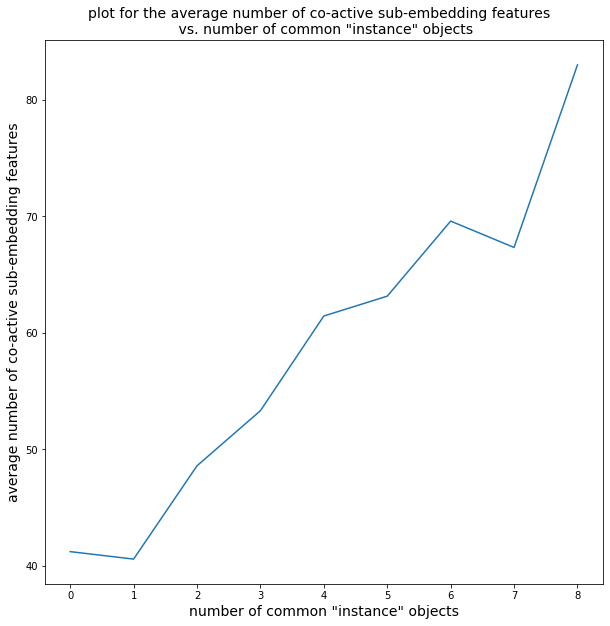

In [63]:
key_list = []
average_list = []



for key in num_co_activ_instances:
    key_list.append(int(key))
    average_list.append(np.average(num_co_activ_instances[key]))

key_list = np.array(key_list)
average_list = np.array(average_list)    
    
sorted_keys = np.argsort(key_list)

key_list = key_list[sorted_keys]
average_list = average_list[sorted_keys]
    
plt.figure(figsize=(10,10))
plt.plot(key_list, average_list)
plt.title('plot for the average number of co-active sub-embedding features  \n vs. number of common "instance" objects',fontsize=14)
plt.ylabel('average number of co-active sub-embedding features',fontsize=14)
plt.xlabel('number of common "instance" objects',fontsize=14)

plt.show()


# average number of co-active sub-embedding features  vs. number of common "stuff" objects

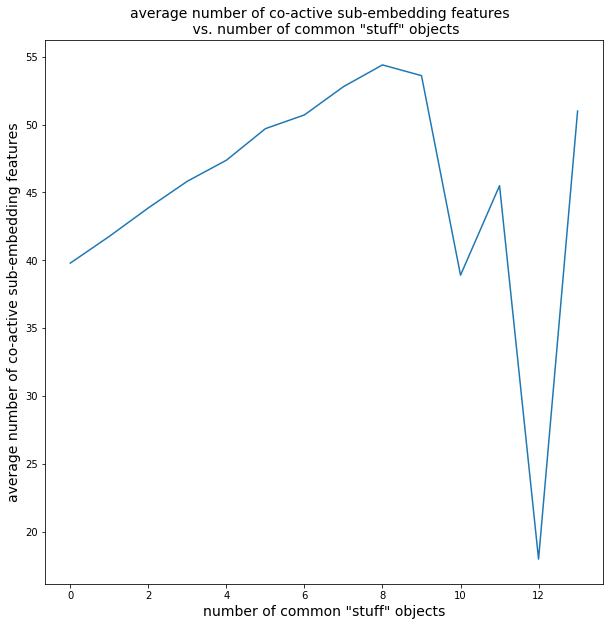

In [62]:
key_list = []
average_list = []
for key in num_co_activ_stuff:
    key_list.append(int(key))
    average_list.append(np.average(num_co_activ_stuff[key]))
    
key_list = np.array(key_list)
average_list = np.array(average_list) 
    
sorted_keys = np.argsort(key_list)

key_list = key_list[sorted_keys]
average_list = average_list[sorted_keys]    
    
plt.figure(figsize=(10,10))
plt.plot(key_list, average_list)
plt.title('average number of co-active sub-embedding features  \n vs. number of common "stuff" objects',fontsize=14)
plt.ylabel('average number of co-active sub-embedding features',fontsize=14)
plt.xlabel('number of common "stuff" objects',fontsize=14)

plt.show()


# average number of co-active sub-embedding features  vs. number of common "instance" & "stuff" objects

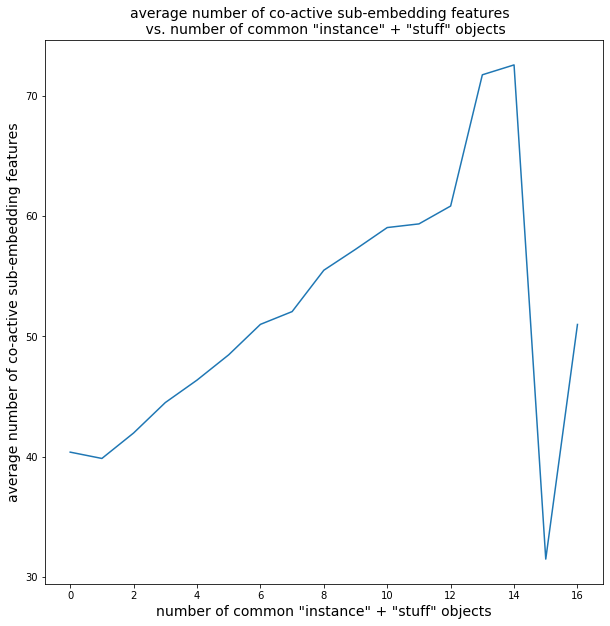

In [61]:
key_list = []
average_list = []
for key in num_co_activ_object:
    key_list.append(int(key))
    average_list.append(np.average(num_co_activ_object[key]))

key_list = np.array(key_list)
average_list = np.array(average_list) 
    
sorted_keys = np.argsort(key_list)

key_list = key_list[sorted_keys]
average_list = average_list[sorted_keys]     
    
plt.figure(figsize=(10,10))
plt.plot(key_list, average_list)
plt.title('average number of co-active sub-embedding features  \n vs. number of common "instance" + "stuff" objects',fontsize=14)
plt.ylabel('average number of co-active sub-embedding features',fontsize=14)
plt.xlabel('number of common "instance" + "stuff" objects',fontsize=14)

plt.show()
